In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UROP.csv')

In [3]:
df.head(5)

,Usage,Age,Time,Output
0,1,7.1,3.0,No
1,1,7.1,1.0,Yes
2,1,7.1,5.0,No
3,1,7.1,2.0,Yes
4,1,7.1,6.0,No


In [4]:
df.shape

(57, 4)

In [5]:
df.describe()

,Usage,Age,Time
count,57.000000,57.000000,57.000000
mean,2.333333,13.207895,3.061404
std,1.170063,5.098841,1.927411
min,1.000000,7.100000,0.000000
25%,1.000000,10.150000,2.000000
50%,2.000000,10.150000,3.000000
75%,3.000000,20.240000,5.000000
max,4.000000,20.240000,8.000000


In [6]:
df['Output'].value_counts()

Yes    30
No     27
Name: Output, dtype: int64

In [7]:
df.isnull().sum()

Usage     0
Age       0
Time      0
Output    0
dtype: int64

In [8]:
X = df.drop(['Output'],axis=1)
y = df['Output']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
model.score(X_train, y_train)

1.0

In [15]:
model.score(X_test, y_test)

0.8333333333333334

In [16]:
base_pred = model.predict(X_test)
base_pred

array(['Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes'], dtype=object)

In [17]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\syam\anaconda3\lib\site-packages (1.0.2)
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.metrics import classification_report,plot_confusion_matrix


In [19]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

          No       0.62      1.00      0.77         5
         Yes       1.00      0.77      0.87        13

    accuracy                           0.83        18
   macro avg       0.81      0.88      0.82        18
weighted avg       0.90      0.83      0.84        18



In [21]:
plot_confusion_matrix(model, X_test, y_test)

TypeError: Expected sequence or array-like, got estimator DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
pd.DataFrame(index=X.columns, data =model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

,Feature Importance
Time,0.528899
Usage,0.425914
Age,0.045187


In [21]:
from sklearn.tree import plot_tree

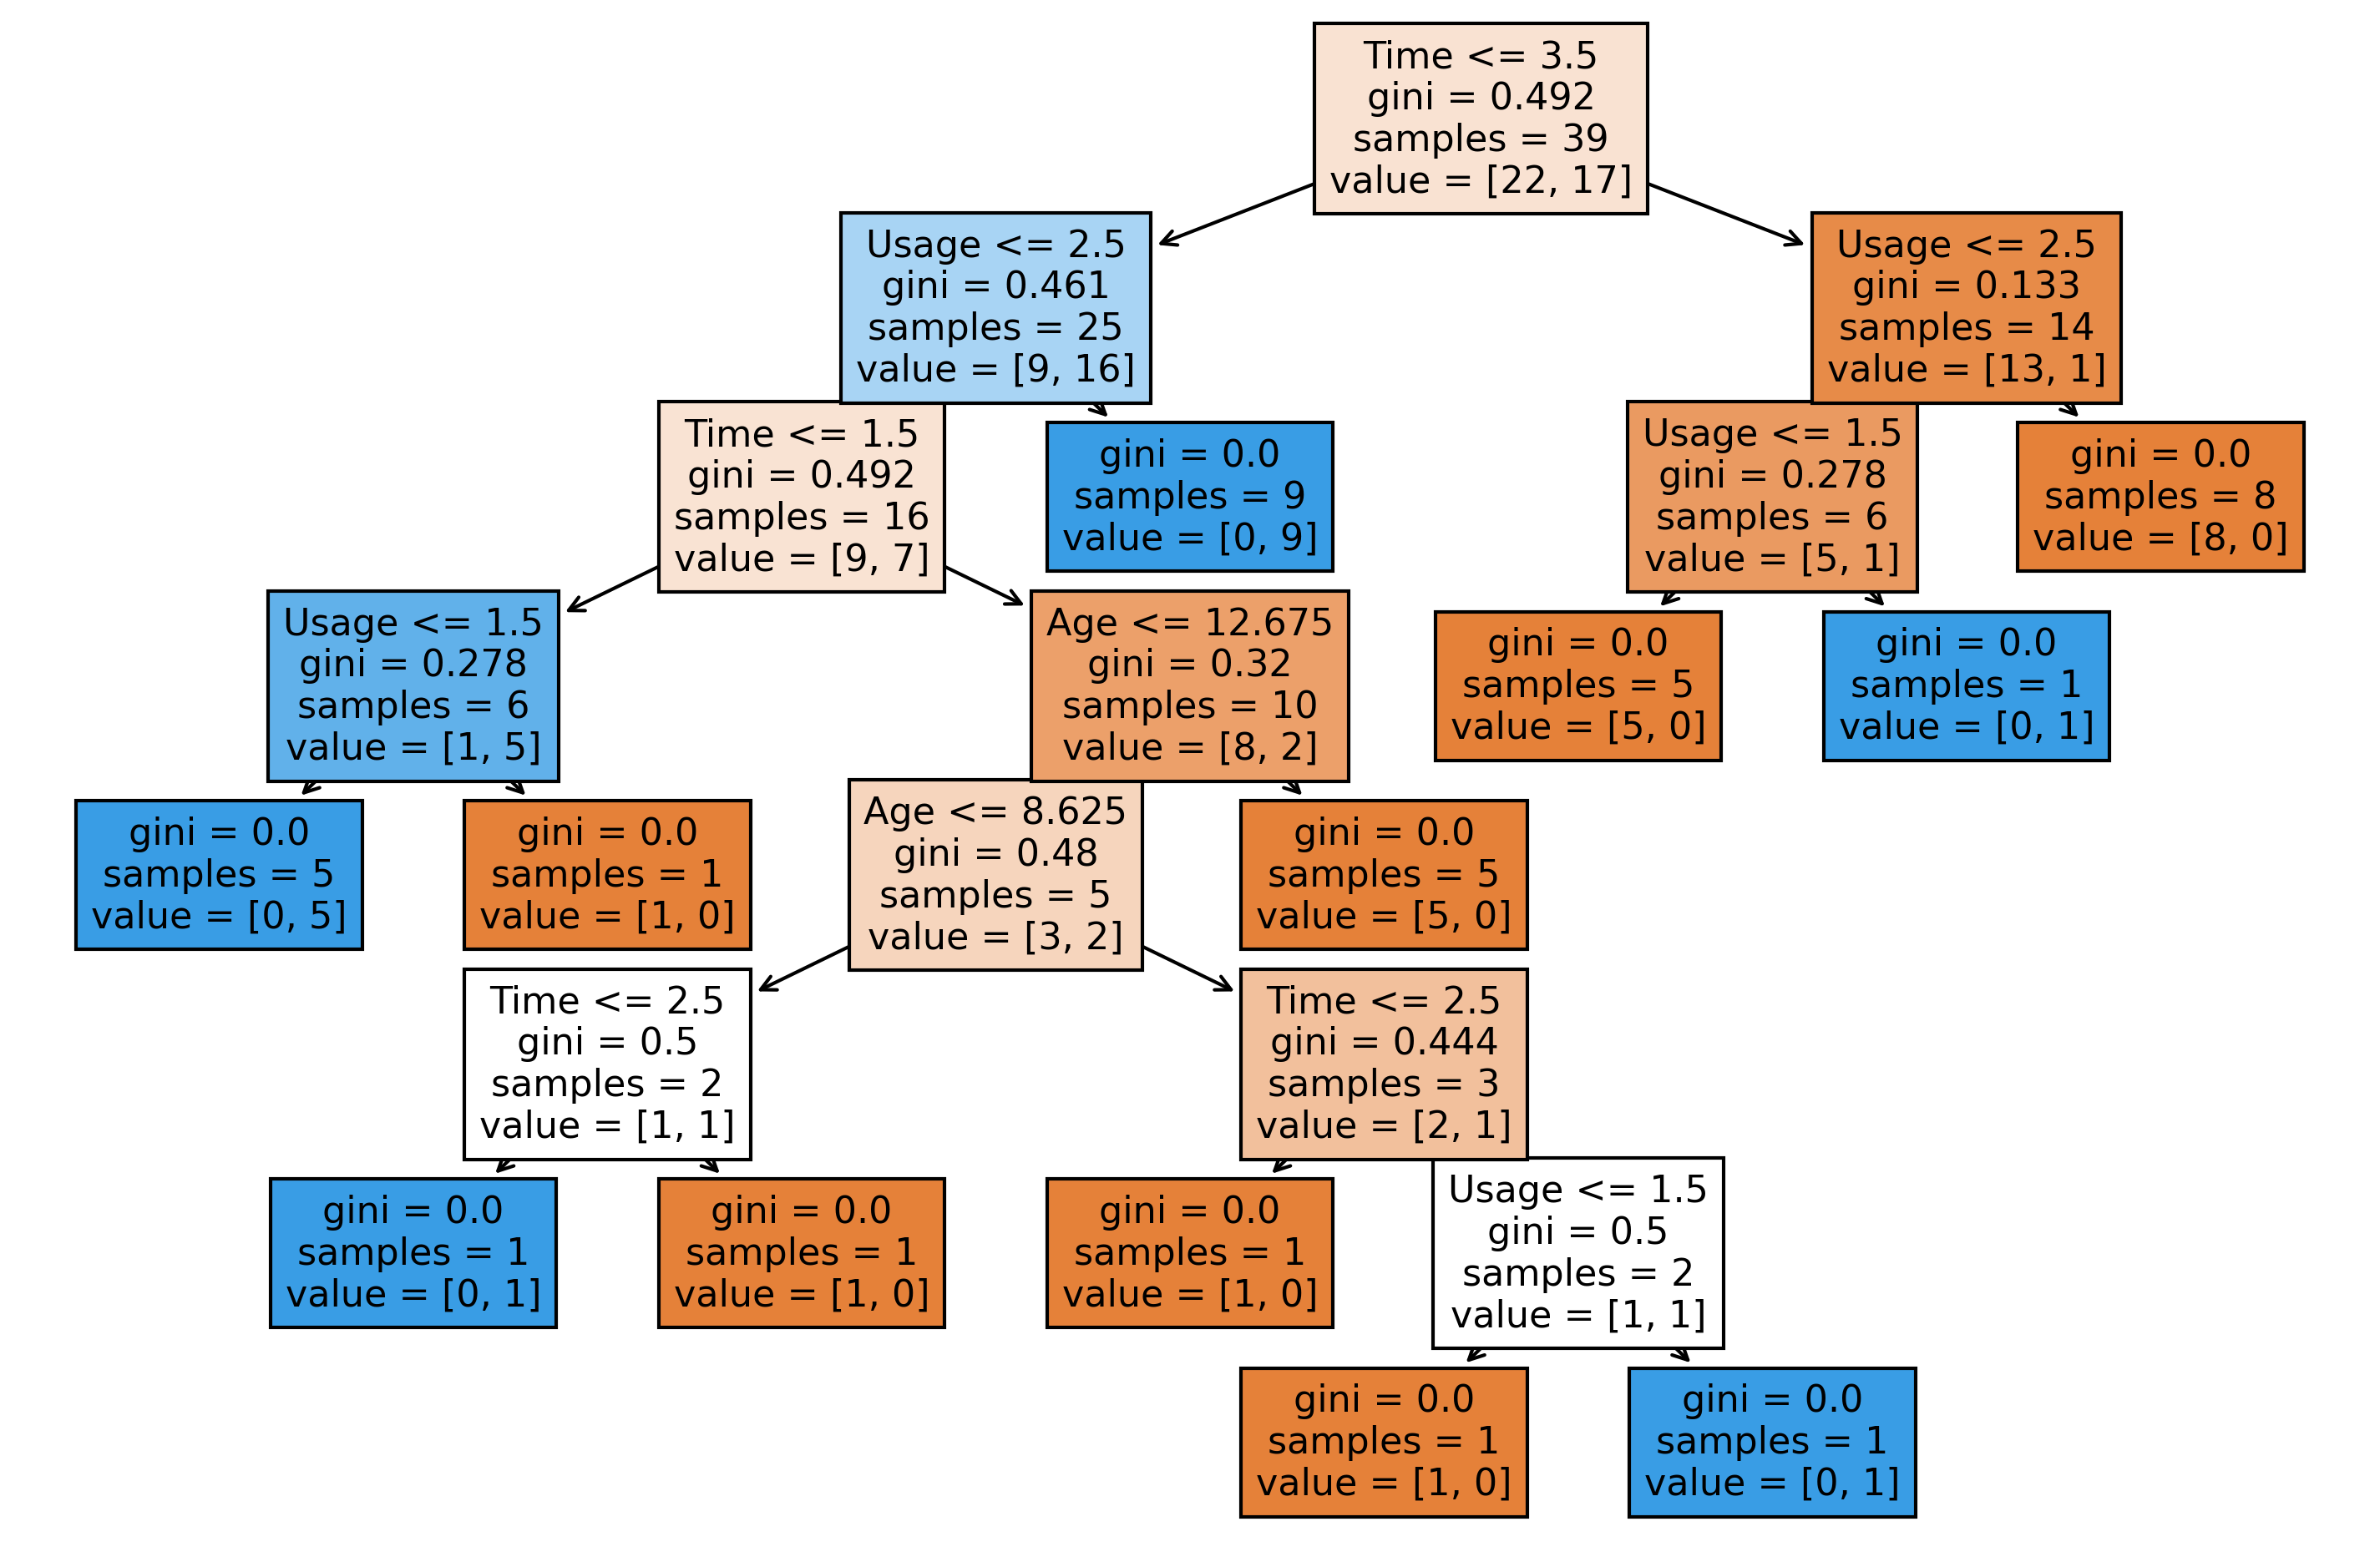

In [22]:
plt.figure(figsize=(12,8), dpi=300)
plot_tree(model, feature_names=X.columns,filled=True);

In [42]:
print (model.predict([[1,10.15,3]]))

['No']


# Navie Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


ImportError: cannot import name '_check_sample_weight' from 'sklearn.utils.validation' (C:\Users\syam\Anaconda3\lib\site-packages\sklearn\utils\validation.py)

In [27]:
na = pd.read_csv("Urop.csv")
na.head()

,Usage,Age,Time,Output
0,1,7.1,3.0,No
1,1,7.1,1.0,Yes
2,1,7.1,5.0,No
3,1,7.1,2.0,Yes
4,1,7.1,6.0,No


In [29]:
number = LabelEncoder()
na['Usage'] = number.fit_transform(na['Usage'])
na['Age'] = number.fit_transform(na['Age'])
na['Time'] = number.fit_transform(na['Time'])

In [30]:
X = df.drop(['Output'],axis=1)
y = df['Output']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [32]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [33]:
model.score(X_train, y_train)

0.8461538461538461

In [34]:
model.score(X_test, y_test)

0.5

In [35]:
base_pred = model.predict(X_test)
base_pred

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes'], dtype='<U3')

In [36]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [37]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

          No       0.25      0.40      0.31         5
         Yes       0.70      0.54      0.61        13

    accuracy                           0.50        18
   macro avg       0.47      0.47      0.46        18
weighted avg       0.57      0.50      0.53        18



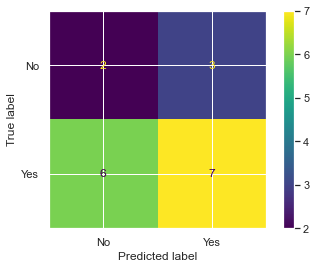

In [38]:
plot_confusion_matrix(model, X_test, y_test)

In [41]:
print (model.predict([[1,10.15,3]]))

['No']


# KNN

In [43]:
kn = pd.read_csv("Urop.csv")
kn.head()

,Usage,Age,Time,Output
0,1,7.1,3.0,No
1,1,7.1,1.0,Yes
2,1,7.1,5.0,No
3,1,7.1,2.0,Yes
4,1,7.1,6.0,No


In [44]:
kn.shape

(57, 4)

In [45]:
kn.info()
kn.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Usage   57 non-null     int64  
 1   Age     57 non-null     float64
 2   Time    57 non-null     float64
 3   Output  57 non-null     object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.9+ KB


Usage     0
Age       0
Time      0
Output    0
dtype: int64

In [46]:
kn.describe()

,Usage,Age,Time
count,57.000000,57.000000,57.000000
mean,2.333333,13.207895,3.061404
std,1.170063,5.098841,1.927411
min,1.000000,7.100000,0.000000
25%,1.000000,10.150000,2.000000
50%,2.000000,10.150000,3.000000
75%,3.000000,20.240000,5.000000
max,4.000000,20.240000,8.000000


In [47]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [59]:
kn['Output'].unique()

array(['No', 'Yes'], dtype=object)

In [60]:
kn['Output'].count()

57

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score

In [56]:
label_quality = LabelEncoder()

In [61]:
kn['Output'] = label_quality.fit_transform(kn['Output'])

In [62]:
kn.head(10)

,Usage,Age,Time,Output
0,1,7.10,3.0,0
1,1,7.10,1.0,1
2,1,7.10,5.0,0
3,1,7.10,2.0,1
4,1,7.10,6.0,0
5,1,10.15,1.0,1
6,1,10.15,0.0,1
7,1,10.15,5.0,0
8,1,10.15,3.0,0
9,1,10.15,2.0,1


In [64]:
Y = kn.Output
X = kn.drop('Output', axis=1)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [66]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [68]:
print('K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))

K Nearest Neighbor Training Accuracy: 0.8222222222222222


In [69]:
sh = confusion_matrix(Y_test, knn.predict(X_test))
sh

array([[5, 1],
       [1, 5]], dtype=int64)

In [71]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [72]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

          No       0.25      0.40      0.31         5
         Yes       0.70      0.54      0.61        13

    accuracy                           0.50        18
   macro avg       0.47      0.47      0.46        18
weighted avg       0.57      0.50      0.53        18



In [75]:
print (model.predict([[1,10.15,3]]))

['No']
